<a href="https://colab.research.google.com/drive/1-UNebnJgWJwEWaeB_94Z4QRppaDf7e8S?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A gentle introduction to supervised learning

Q: What types of ML problems do exist apart from supervised learning?

Supervised problem statement: given a dataset ${\cal D}=\{y_i, x_i\}_{i=1}^{N}$ what can we say about $y$ that corresponds to a previously unseen $x$?

A goal is to build a function $\hat y(x)$ that will estimate true values of $y$. The estimator should be optimal in some sence. To set up an optimization problem, a cost (loss) function $\ell(y, \hat y)$ is required. Some common loss functions:
* quadratic (L2) loss $\ell_2(y, \hat y) = (y-\hat y)^2$
* L1 loss $\ell_1(y, \hat y) = |y-\hat y|$
* 0-1 loss $\ell_{0-1}(y, \hat y) = I(y=\hat y)$
* Huber loss

Once loss function is fixed, an optimal prediction is (by definition) a function $\hat y^*(\cdot)$ that minimizes a *generalization loss*:
$$L_p(\hat y) = E_{p_{x, y}}\ell(y, \hat y (x)) ,$$
where $p(x, y)$ denotes a joint probability function of $x$ and $y$.

#### Exercise 1
Show that
$$\hat y^*(x) = \arg\min_{\hat y} E(\ell(y, \hat y(x) | x)) = \arg\min_{\hat y} E_{y\sim p_{y|x}}\ell(y, \hat y(x)) \tag{1}$$
The exercise learns that we actually need only a *posterior* distribution $p_{y|x}$ instead of
full joint $p(x, y)$ distribution to obtain an optimal prediction.

#### Exercise 2
Show that quadratic loss $\ell_2(y, \hat y)$ resutls in optimal prediction $\hat y^*(x) = E(y|x)$

#### Exercise 3
Show that for 0-1 loss, optimal prediction is a mode of distribution: $\hat y^*(x) = \arg\max_{y} p(y, x)$

#### Exercise 4
Let $p(y|x={\rm x}) = 0.8\delta(y-{\rm x}) + 0.2\delta(y+{\rm x})$. Find optimal prediction for quardratic and 0-1 loss.

In practice we do not know neither $p(x, y)$ nor $p(y|x)$. All we have is a dataset ${\cal D}$.
Ideas:

(i) let's approximate $p(y|x)$ with $p_{\cal D}(y|x)$ and use (1)

(ii) let's define an empirical risk $L_{\cal D}(\hat y)$ and consider the empirical risk minimization (ERM) problem

Empirical risk is naturally defined as
$$L_{\cal D}(\hat y) = \frac{1}{N}\sum_{i=1}^{N} \ell(y_i, \hat y(x_i))$$

Question: what approach, (i) or (ii), seems to be more generic?

How we can learn $p_{\cal D}(y|x)$ from a dataset ${\cal D}$? A common approach is to consider a parametric family $p(y|x, \theta)$ and optimize $\theta$ somehow, e.g. to maximize the likelihood $\prod_i p(y_i|x_i, \theta)$. We call this *discriminative* probabilistic model. An alternative approach is to consider a parametric family for joint distribution $p(x, y |\theta)$. We call this *generative* probabilistic model (one can generate $x \sim p(x|\theta)$).

Now we move to the linear regression model which gives an example of the discriminative probabilistic models.

# Basic linear regression

Linear regression is a model of the form
$$p(y|x,\theta) = \mathcal N(y|w^Tx, \sigma^2)\tag{2}$$
Here $\theta = (w, \sigma)$ is a vector of unknown parameters. The notation should be interpreted as follows. Given a dataset $\cal{D}=\{y_i, x_i\}_{i=1}^{N}$ we assume
$$y_i = w^Tx_i + \varepsilon_i,$$
where $\varepsilon_i\sim IID \,  \cal{N}(0, \sigma^2)$ values.

How to estimate $\theta$ in the presence of $\cal{D}$? Basic approach is the MLE estimator:
$$\hat\theta = \arg\max_\theta p(\theta|\cal D)$$
The likelihood $p(\theta|{\cal D}) = \prod_i p(y_i|w^Tx_i, \sigma^2)$. It is more convenient to consider negative log-likelihood (NLL) function and its minimization:
$$\hat\theta = \arg\min_\theta (-\log p(\theta|{\cal D})) = \arg\min_\theta(-\sum_i \log p(y_i|w^Tx_i, \sigma^2))$$

Suppose $\hat\theta$ is estimated (no matter how at the moment). What is the optimal prediction $\hat y(x)$? Assuming $\ell_2$ loss function we obtain $\hat y(x) = E(y|x)$. According to (2) this results in $\hat y(x) = \hat{w}^Tx$. Note that we do not need $\sigma$ to make a prediction with linear regression model.

Consider the NLL minimization only with respect to $w$. One can easily (!) show that the problem is equivalent to minimization of the sum of squared errors (SSE):
$$\sum_{i=1}^{N}(y_i - w^Tx_i)^2$$
Often one considers a minimization of the mean squared error (MSE):
$$\frac{1}{N}\sum_{i=1}^{N}(y_i - w^Tx_i)^2$$
And here we get a link to the ERM problem. Indeed, MSE is just the empirical risk for quadratic loss function.
Finally, the solution is
$$\hat w = (X^TX)^{-1}X^TY$$
Let's make some practice.

## Numerical experiment

Consider a joint distribution $$p(x, y) = p(y|x)p(x),$$ where $$y|x \sim N(\sin{2 \pi x}, s^2), s= 0.1,$$ $$x \sim U[0, 1].$$
Let's generate a dataset and visualize it:

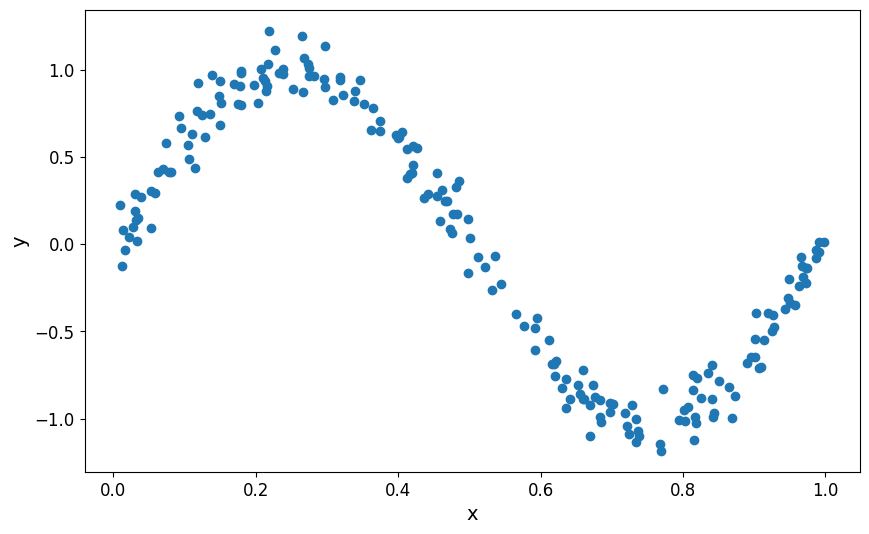

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from scipy import integrate

N = 200
s = 0.1

np.random.seed(111)
x_d = np.random.random(N)
y_d = np.sin(2 * np.pi * x_d) + s * np.random.randn(N)

plt.figure(figsize=(10, 6))
plt.scatter(x_d, y_d)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.show()

Obviously, it is not very instructive to consider linear dependence of $y$ on $x$. What if we add more features and condiser $y$ depending on $x$, $x^2$, $x^3$, .... (recall the Taylor series). 

Indeed, let $\phi(x_i) = (1, x_i, x_i^2, ..., x_i^M)$ is a feature vector. $M$ is the model order.

Let $M = 12$ and build a feature matrix $F$:

In [3]:
M = 12
F = np.vstack([x_d ** i for i in range(M + 1)]).T

Split the dataset into train and test parts:

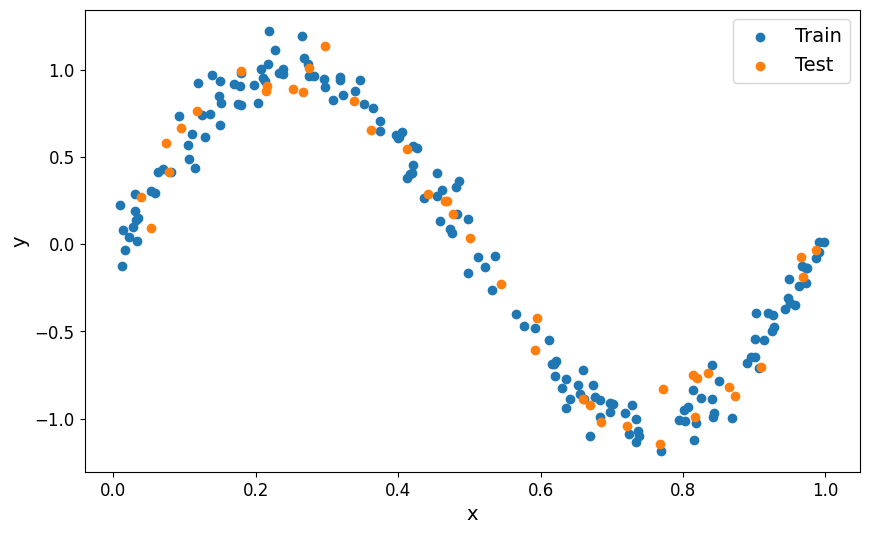

In [4]:
F_train, F_test, y_train, y_test = train_test_split(F, y_d, test_size=0.2, random_state=42)

plt.figure(figsize=(10, 6))
plt.scatter(F_train[:, 1], y_train, label='Train')
plt.scatter(F_test[:, 1], y_test, label='Test')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(fontsize=14)
plt.show()

Following the formula $\hat w = (X^TX)^{-1}X^TY$ we define the estimator:

In [5]:
def ols(X, Y):
    return np.linalg.inv(X.T @ X) @ X.T @ Y

Let's derive the solution 

In [6]:
w_12 = ols(F_train, y_train)

and compare the model of order $M=20$ with models of lower order $M=1$ (linear) and $M=3$ (cubic):

In [7]:
w_1 = ols(F_train[:, :2], y_train)
w_3 = ols(F_train[:, :4], y_train)

Plot the regression models obtained:

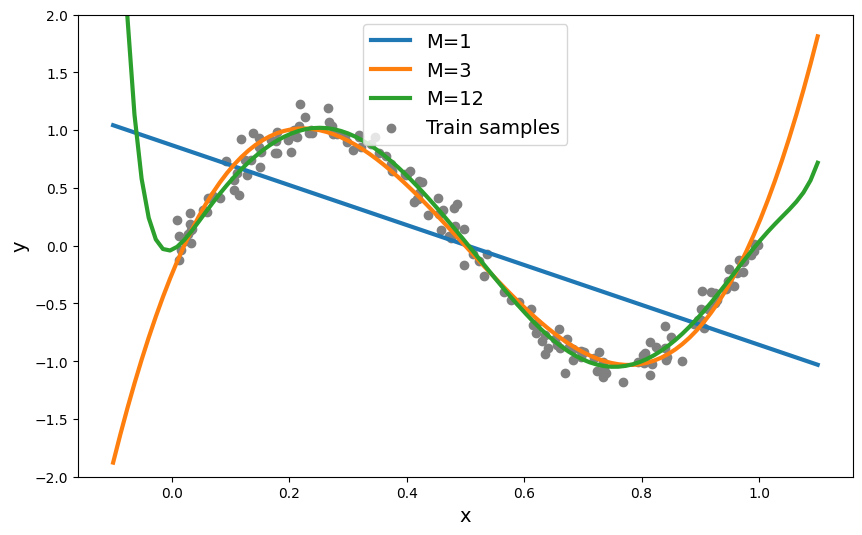

In [8]:
plt.figure(figsize=(10, 6))
x = np.linspace(-0.1, 1.1, 100).reshape(-1, 1)
plt.plot(x, (x ** np.arange(2)) @ w_1, label='M=1', lw=3)
plt.plot(x, (x ** np.arange(4)) @ w_3, label='M=3', lw=3)
plt.plot(x, (x ** np.arange(13)) @ w_12, label='M=12', lw=3)
plt.scatter(F_train[:, 1], y_train, c='gray', label='Train samples')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(fontsize=14)
plt.ylim(-2, 2)
plt.show()

What do we note?
* model $M=1$ is too simple
* model $M=12$ looks unnatural
* model $M=3$ is quite fine

How to estimate the goodness of the model? We have several measures:
* Train loss
* Test loss

and we can compare them with the generalization loss which gives the optimal prediction loss.

Recall that since we know $p$ in our synthetic case we can compute $L_p(\hat y)$ (generalization loss). Given $\ell_2$ loss function we obtain:
$$L_p(\hat y) = E_p(y - \hat y(x))^2 = \int (y - \phi(x)w^T)^2 p(x, y) {\rm d}x {\rm d}y.$$

#### Exercise 5
Show that `model_score` defined below computes $L_p(\hat y)$.

In [9]:
def model_score(w, s=0.1):
    def p(x, w, s):
        y = np.dot(x ** np.arange(len(w)), w)
        return np.sin(2 * np.pi * x) ** 2 + s ** 2 - 2 * np.sin(2 * np.pi * x) * y + y ** 2       
    return integrate.quad(lambda x: p(x, w, s), 0, 1)[0]

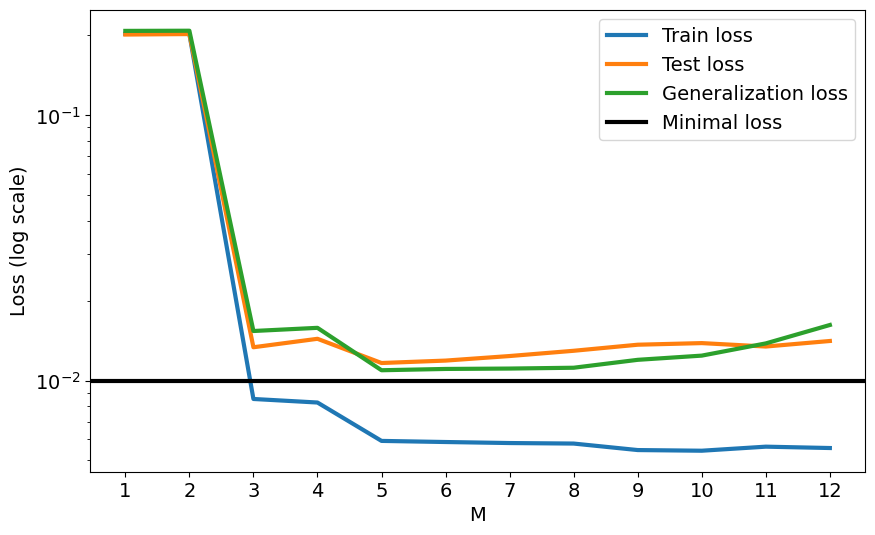

In [10]:
loss_train = []
loss_test = []
loss_model = []

N_CLIP = 50

for m in range(2, M + 2):
    reg = ols(F_train[:N_CLIP, :m], y_train[:N_CLIP])    
    loss_test.append(np.mean((F_test[:, :m] @ reg - y_test) ** 2))
    loss_train.append(np.mean((F_train[:N_CLIP, :m] @ reg - y_train[:N_CLIP]) ** 2))
    loss_model.append(model_score(reg))

plt.figure(figsize=(10, 6))
plt.semilogy(loss_train, label='Train loss', lw=3)
plt.semilogy(loss_test, label='Test loss', lw=3)
plt.semilogy(loss_model, label='Generalization loss', lw=3)
plt.axhline(s ** 2, color='black', label='Minimal loss', lw=3)
plt.xlabel('M', fontsize=14)
plt.ylabel('Loss (log scale)', fontsize=14)
plt.xticks(np.arange(M), np.arange(1, M + 1), fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14)
plt.show()

We note that
* Test loss gives an approximation of the generalization loss
* Train, test and generalization loss depend on model complexity. There are optimal values of $M$ for which generalization loss is low
* Generalization loss is limited from below by some value
* Train loss is typically smaller than test loss
* At some point train loss starts to decrease while test loss starts to increase (overfitting)

What is the lower bound for generalization loss? 
Consider the decomposition
$$L_p(\hat w) = L_p(\hat y^*) + (L_p(w^*) - L_p(\hat y^*)) + (L_p(\hat w) - L_p(w^*))$$
where $\hat w$ is the MLE estimation given the dataset $\cal D$, $w^*$ is the optimal solution for a fixed parametric family (over all possible  $w$), $\hat y^*$ is the optimal estimation (over all possible model). The decomposition contains:
* $(L_p(w^*) - L_p(\hat y^*))$ is a bias caused by a certain parametric family choice
* $(L_p(\hat w) - L_p(w^*))$ is an estimation error caused by inaccurace in estimation due to a limited dataset size
* $L_p(\hat y^*)$ is an irreducable error.

#### Exercise 6
Show that $L_p(\hat y^*)=\sigma^2$ for the linear regression model. 

## Dataset size matters

Consider a role of the dataset size for a model $M=3$.

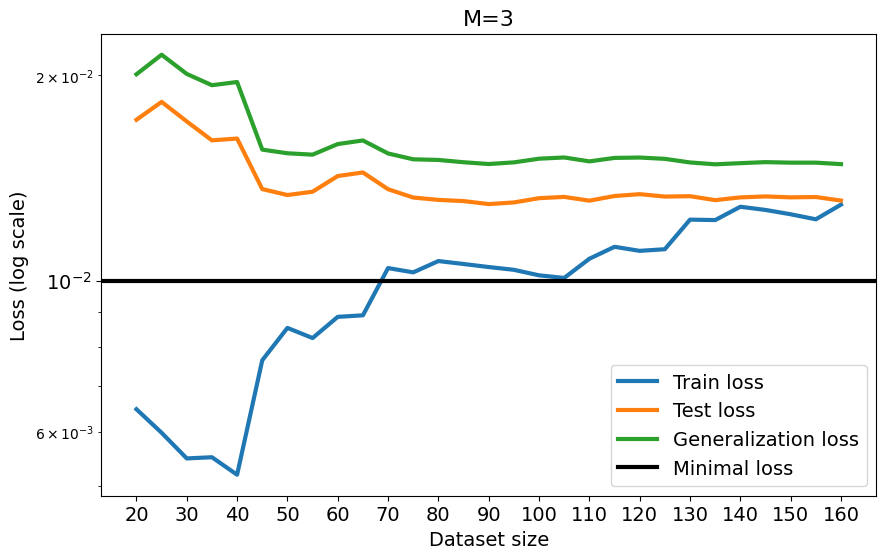

In [11]:
m = 3

loss_train = []
loss_test = []
loss_model = []

dataset_sizes = np.arange(20, len(F_train)+1, 5).astype(int)
for n in dataset_sizes:
    reg = ols(F_train[:n, :m + 1], y_train[:n])      
    loss_test.append(np.mean((F_test[:, :m + 1] @ reg - y_test) ** 2))
    loss_train.append(np.mean((F_train[:n, :m + 1] @ reg - y_train[:n]) ** 2))
    loss_model.append(model_score(reg))

plt.figure(figsize=(10, 6))
plt.semilogy(loss_train, label='Train loss', lw=3)
plt.semilogy(loss_test, label='Test loss', lw=3)
plt.semilogy(loss_model, label='Generalization loss', lw=3)
plt.axhline(s ** 2, color='black', label='Minimal loss', lw=3)
plt.xlabel('Dataset size', fontsize=14)
plt.ylabel('Loss (log scale)', fontsize=14)
plt.xticks(np.arange(len(dataset_sizes))[::2], dataset_sizes[::2])
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14)
plt.title('M=3', fontsize=16)
plt.show()

We note that train, test and geleralization loss tend to some constant value as $N\to+\infty$. Indeed, $\hat w \to w^*$ due to the consistency of MLE estimator. Thus $L_p(\hat w) \to L_p(w^*)$ and the margin $(L_p(w^*) - L_p(\hat y^*))$ is defined by model bias.

For conmarison consider a model $M=7$ which gives lower bias:

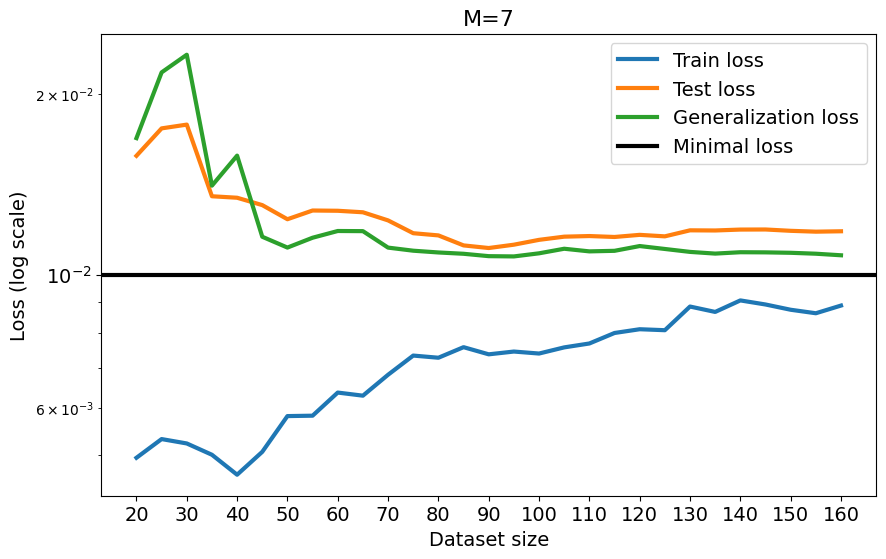

In [12]:
m = 7

loss_train = []
loss_test = []
loss_model = []

dataset_sizes = np.arange(20, len(F_train)+1, 5).astype(int)
for n in dataset_sizes:
    reg = ols(F_train[:n, :m + 1], y_train[:n])      
    loss_test.append(np.mean((F_test[:, :m + 1] @ reg - y_test) ** 2))
    loss_train.append(np.mean((F_train[:n, :m + 1] @ reg - y_train[:n]) ** 2))
    loss_model.append(model_score(reg))

plt.figure(figsize=(10, 6))
plt.semilogy(loss_train, label='Train loss', lw=3)
plt.semilogy(loss_test, label='Test loss', lw=3)
plt.semilogy(loss_model, label='Generalization loss', lw=3)
plt.axhline(s ** 2, color='black', label='Minimal loss', lw=3)
plt.xlabel('Dataset size', fontsize=14)
plt.ylabel('Loss (log scale)', fontsize=14)
plt.xticks(np.arange(len(dataset_sizes))[::2], dataset_sizes[::2])
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14)
plt.title('M=7', fontsize=16)
plt.show()

## Model selection

How to choose the best model hyperparameters? Common idea is to implemet a grid search in a space of hyperparameters and use some robust estimator, e.g. K-Fold cross-validation. Let's see how it works:

In [15]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=123)

loss_m = []
for m in range(2, M + 2):
    loss_k = []
    for train_index, test_index in kf.split(F_train):
        Fk_train, Fk_test = F_train[train_index], F_train[test_index]
        yk_train, yk_test = y_train[train_index], y_train[test_index]
        reg = ols(Fk_train[:, :m], yk_train)
        loss_k.append(np.mean((Fk_test[:, :m] @ reg - yk_test) ** 2))
    loss_m.append(np.mean(loss_k))

Plot model scores against model hyperparameter $M$:

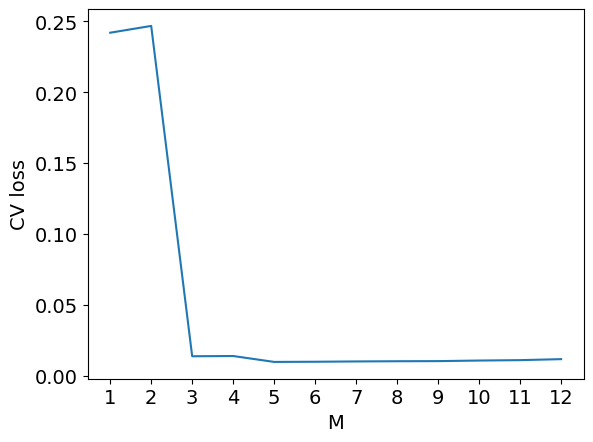

In [14]:
plt.plot(loss_m)
plt.xlabel('M', fontsize=14)
plt.ylabel('CV loss', fontsize=14)
plt.xticks(np.arange(M), np.arange(1, M + 1), fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

It looks reasonable to choose the simplest model between the best ones, thus we conclude $M$=3 is optimal value.

## Regularization

Let's investigate numerical values of regression coefficients for different $M$:

In [16]:
m = 3
reg = ols(F_train[:, :m + 1], y_train)  
reg

array([ -0.24597388,  12.48437763, -35.94744304,  23.90860474])

In [17]:
m = 7
reg = ols(F_train[:, :m + 1], y_train)  
reg

array([-4.71206649e-02,  6.19295685e+00,  1.03813721e+01, -1.15702012e+02,
        2.16778146e+02, -2.04389944e+02,  1.26924414e+02, -4.01228722e+01])

In [18]:
m = 12
reg = ols(F_train[:, :m + 1], y_train)  
reg

array([-3.66490542e-02,  1.93980429e+00,  1.33991450e+02, -1.77950550e+03,
        1.30341184e+04, -6.18875221e+04,  1.94724820e+05, -4.12590169e+05,
        5.91210915e+05, -5.64589791e+05,  3.44067233e+05, -1.21018013e+05,
        1.86920541e+04])

Larger $M$ results in larger amplitudes of regression coefficient. Why so?

The reason is in the $(X^T X)^{-1}$ matrix. If $X^T X$ becomes ill-conditioned, inverse matrix will contain large values. This follows from the definition of condition number:
$$\mu(A) = ||A|| \cdot ||A^{-1}||$$

Why a square matrix, say $A$, can be ill-conditioned? The following cases are equvalent:
* $\det A$ is close to 0 (singular matrix)
* some eigenvalues are close to 0
* some columns of $A$ are (almost) linear dependent.

If some eigenvalues of $X^T X$ are close to zero, it implies that for some $v$ (eigenvector) 
$$X^T X v \approx 0$$
Also 
$$v^TX^T X v = (Xv, Xv) \approx 0$$
We obtain that some columns of $X$ are (almost) linear denendent.
Obviously, this works in contrary as well. See [here](https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/lecture-17.pdf) for more details.

Lets plot condition numbers for different $M$ (note the log scale and how fast the condition number growth):

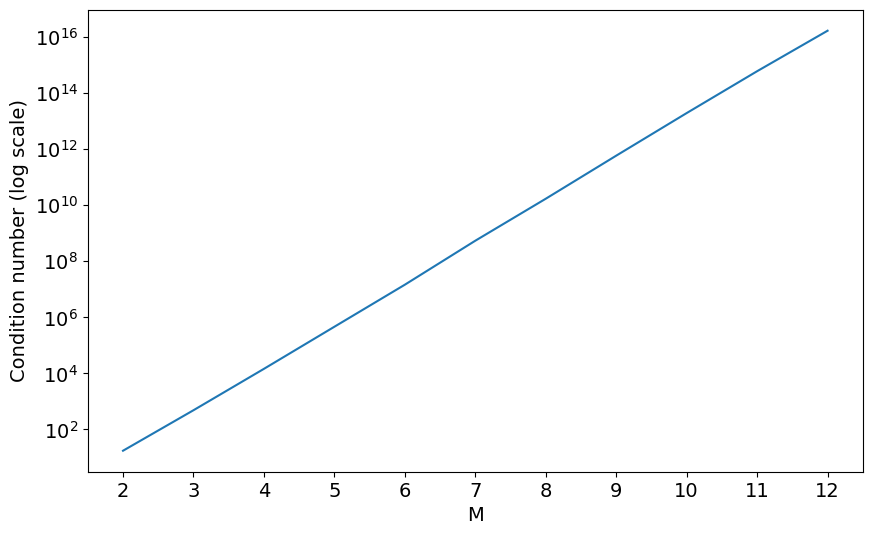

In [19]:
cond = np.array([np.linalg.cond(np.dot(F_train[:, :m].T, F_train[:, :m])) for m in range(2, M + 1)])

plt.figure(figsize=(10, 6))
plt.semilogy(cond)
plt.xticks(np.arange(M - 1), np.arange(2, M + 1))
plt.xlabel('M', fontsize=14)
plt.ylabel('Condition number (log scale)', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

Regularization helps to control the condition number.

### L2 (ridge) regularization

An idea is to add $\lambda ||w||^2$ term to MSE loss. 

#### Exercise
Show that MSE + L2 regularization term results in solution
$$\hat w = (X^TX + \lambda I)^{-1}X^TY$$

Implement L2 regularization

In [20]:
def ols_L2(X, Y, alpha):
    I = np.eye(X.shape[1])
    return np.linalg.inv(X.T @ X + alpha * I) @ X.T @ Y

Regression coefficients become smaller

In [21]:
m = 12
reg = ols_L2(F_train[:, :m + 1], y_train, alpha=0.0001)  
reg

array([ -0.10800645,   8.846008  , -16.13081528,  -8.59347038,
         6.2921985 ,  10.54799057,   7.13295388,   1.47609397,
        -3.07134494,  -5.10434573,  -4.35660892,  -1.10218573,
         4.18472233])

And we get a nice approximation:

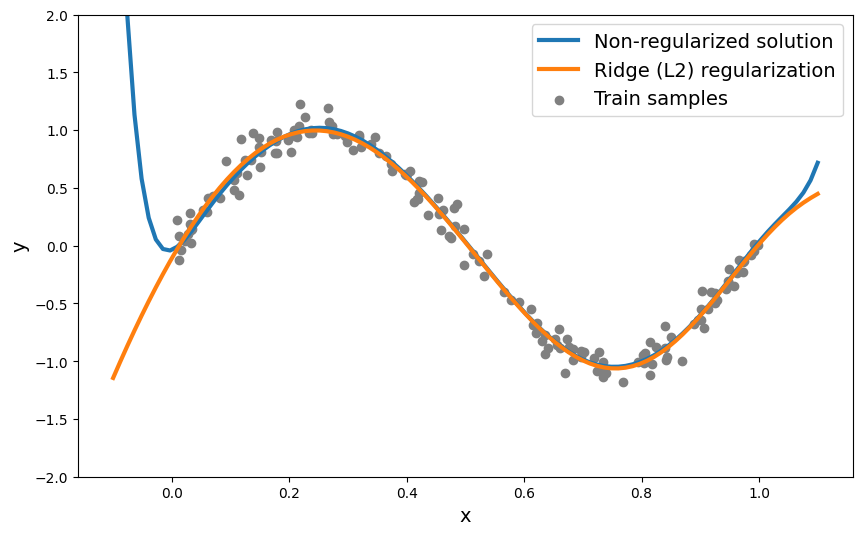

In [22]:
plt.figure(figsize=(10, 6))
x = np.linspace(-0.1, 1.1, 100).reshape(-1, 1)
plt.plot(x, (x ** np.arange(13)) @ w_12, label='Non-regularized solution', lw=3)
plt.plot(x, (x ** np.arange(13)) @ reg, label='Ridge (L2) regularization', lw=3)
plt.scatter(F_train[:, 1], y_train, c='gray', label='Train samples')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(fontsize=14)
plt.ylim(-2, 2)
plt.show()

## L1 (Lasso) regularization

Another common approach is adding a L1 term $\lambda \sum |w_i|$. This does not lead to a closed-frm solution and we apply iterative algorithm:

In [23]:
lasso = Lasso(alpha=.0001, fit_intercept=False, max_iter=100000).fit(F_train, y_train)
lasso.coef_

array([ -0.07624146,   8.78560908, -18.62657322,  -0.        ,
         0.        ,  12.51054639,   0.        ,   0.        ,
         0.        ,  -0.        ,  -0.        ,  -0.        ,
        -2.62017226])

Note that some coefficients become zero. Thus, L1 leads to feature selection.

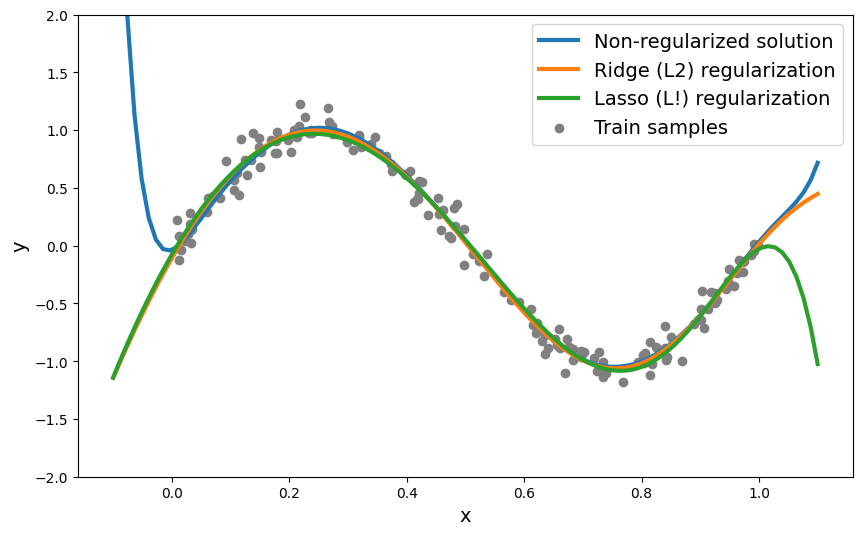

In [24]:
plt.figure(figsize=(10, 6))
x = np.linspace(-0.1, 1.1, 100).reshape(-1, 1)
plt.plot(x, (x ** np.arange(13)) @ w_12, label='Non-regularized solution', lw=3)
plt.plot(x, (x ** np.arange(13)) @ reg, label='Ridge (L2) regularization', lw=3)
plt.plot(x, (x ** np.arange(13)) @ lasso.coef_, label='Lasso (L!) regularization', lw=3)
plt.scatter(F_train[:, 1], y_train, c='gray', label='Train samples')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(fontsize=14)
plt.ylim(-2, 2)
plt.show()